<a href="https://colab.research.google.com/github/uzair011/CN6022/blob/main/flights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 01

In [1]:
!pip install pyspark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [3]:
dff = spark.read.csv('/content/Combined_Flights_2022.csv',inferSchema=True, header =True)


In [4]:
from pyspark.sql import SparkSession



spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

print("SparkSession initialized successfully!")


SparkSession initialized successfully!


In [5]:
print(dff.count())

208332


In [6]:
dff.printSchema()

root
 |-- FlightDate: date (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |

In [7]:
# 1. Average Departure Delay by Airline:

# Register the DataFrame as a SQL temporary view
dff.createOrReplaceTempView("flights")

# SQL query to find average departure delay by airline
avg_dep_delay_by_airline = spark.sql("""
    SELECT Airline, AVG(DepDelayMinutes) as AvgDepDelay
    FROM flights
    GROUP BY Airline
    ORDER BY AvgDepDelay DESC
""")

# Show the result
avg_dep_delay_by_airline.show()

+--------------------+------------------+
|             Airline|       AvgDepDelay|
+--------------------+------------------+
|Southwest Airline...|  17.8786564903632|
|American Airlines...|15.782118405155055|
|GoJet Airlines, L...|14.906091370558375|
|Commutair Aka Cha...|14.833592534992224|
|  Mesa Airlines Inc.|12.470290278589518|
|   Republic Airlines|12.192436115843272|
|   Endeavor Air Inc.| 9.726229099076615|
|Air Wisconsin Air...| 7.115979381443299|
+--------------------+------------------+



In [8]:
# Convert the PySpark DataFrame to Pandas for visualization
pandas_df = avg_dep_delay_by_airline.toPandas()


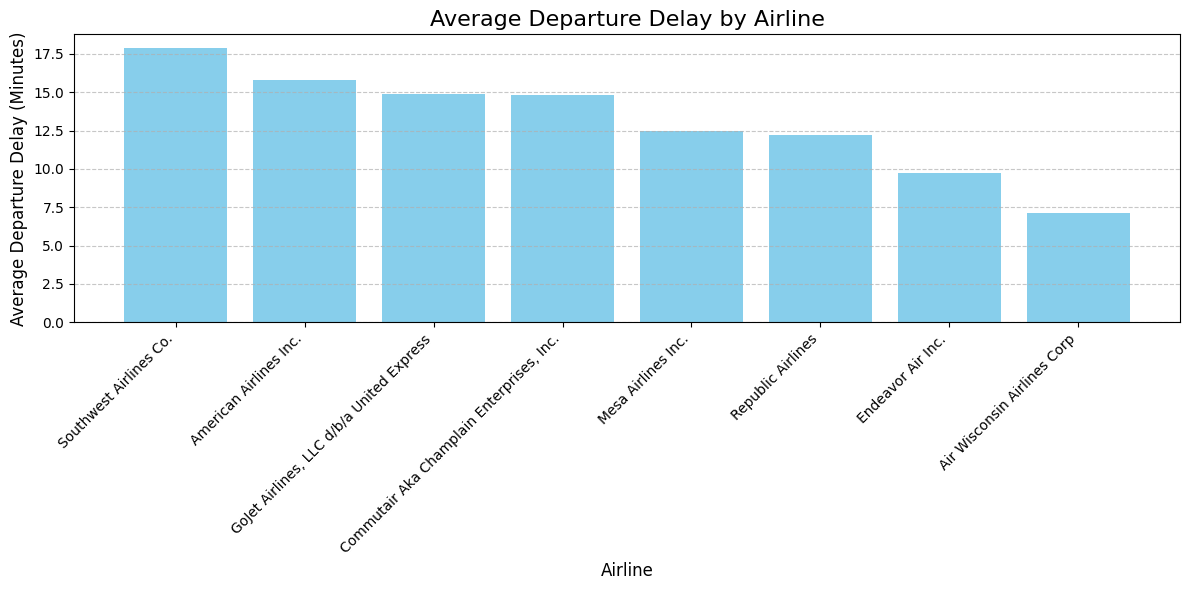

In [9]:
import matplotlib.pyplot as plt

# Create a bar plot for average departure delay by airline
plt.figure(figsize=(12, 6))
plt.bar(pandas_df['Airline'], pandas_df['AvgDepDelay'], color='skyblue')
plt.title('Average Departure Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Departure Delay (Minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-10-7ad662887120>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pandas_df, x='Airline', y='AvgDepDelay', palette='Blues_d')


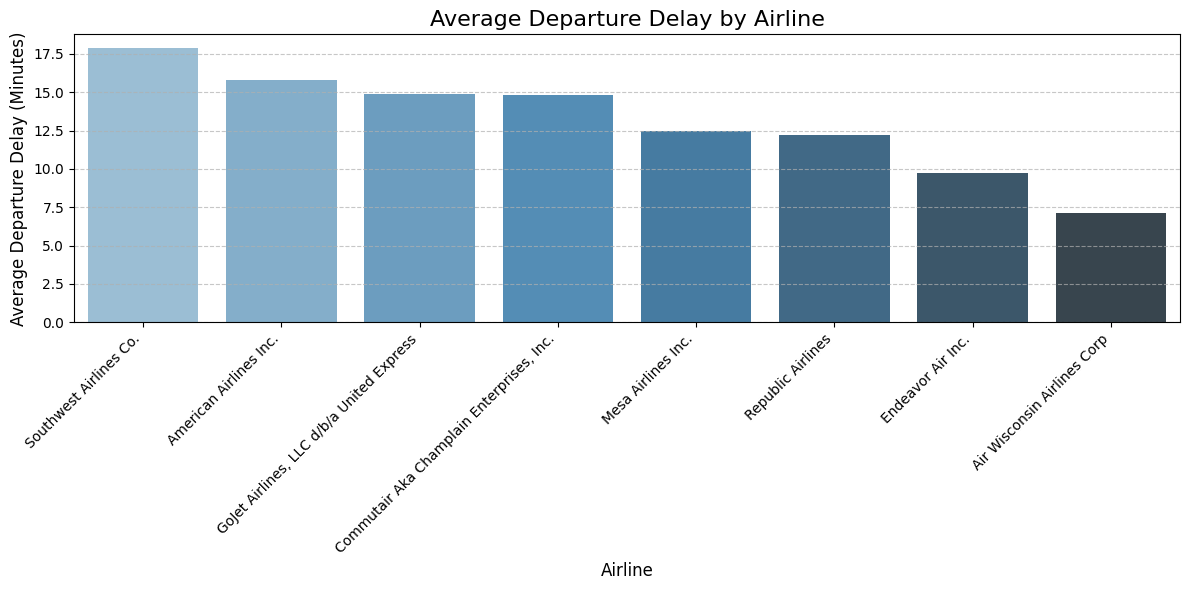

In [10]:
import seaborn as sns

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=pandas_df, x='Airline', y='AvgDepDelay', palette='Blues_d')
plt.title('Average Departure Delay by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Departure Delay (Minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
# 2. Count Flights by Origin and Destination:

# SQL query to count flights by origin and destination
flight_counts = spark.sql("""
    SELECT Origin, Dest, COUNT(*) as FlightCount
    FROM flights
    GROUP BY Origin, Dest
    ORDER BY FlightCount DESC
""")

# Show the result
flight_counts.show(30)


+------+----+-----------+
|Origin|Dest|FlightCount|
+------+----+-----------+
|   DCA| LGA|        576|
|   LGA| DCA|        521|
|   LGA| CLT|        451|
|   CLT| LGA|        426|
|   LAS| PHX|        387|
|   PHX| LAS|        387|
|   BUR| OAK|        383|
|   OAK| BUR|        382|
|   SNA| PHX|        374|
|   SAN| PHX|        361|
|   ORD| LGA|        359|
|   LGA| ORD|        359|
|   LGA| PIT|        358|
|   PIT| LGA|        357|
|   LGA| STL|        349|
|   LGA| BOS|        349|
|   STL| LGA|        348|
|   BOS| LGA|        348|
|   PHX| SNA|        340|
|   PHX| SAN|        338|
|   SMF| SAN|        336|
|   SJC| SAN|        335|
|   SAN| SJC|        335|
|   SAN| SMF|        335|
|   BOS| DCA|        330|
|   BUR| SJC|        329|
|   SJC| BUR|        329|
|   SMF| BUR|        328|
|   BUR| SMF|        328|
|   DCA| BOS|        320|
+------+----+-----------+
only showing top 30 rows



In [12]:
# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = flight_counts.toPandas()

# Pivot data to create a matrix for the heatmap
# heatmap_data = pandas_df.pivot(index="Origin", columns="Dest", values="FlightCount")

# Filter the Pandas DataFrame for the top 30 routes by FlightCount
top_routes = pandas_df.sort_values(by='FlightCount', ascending=False).head(30)


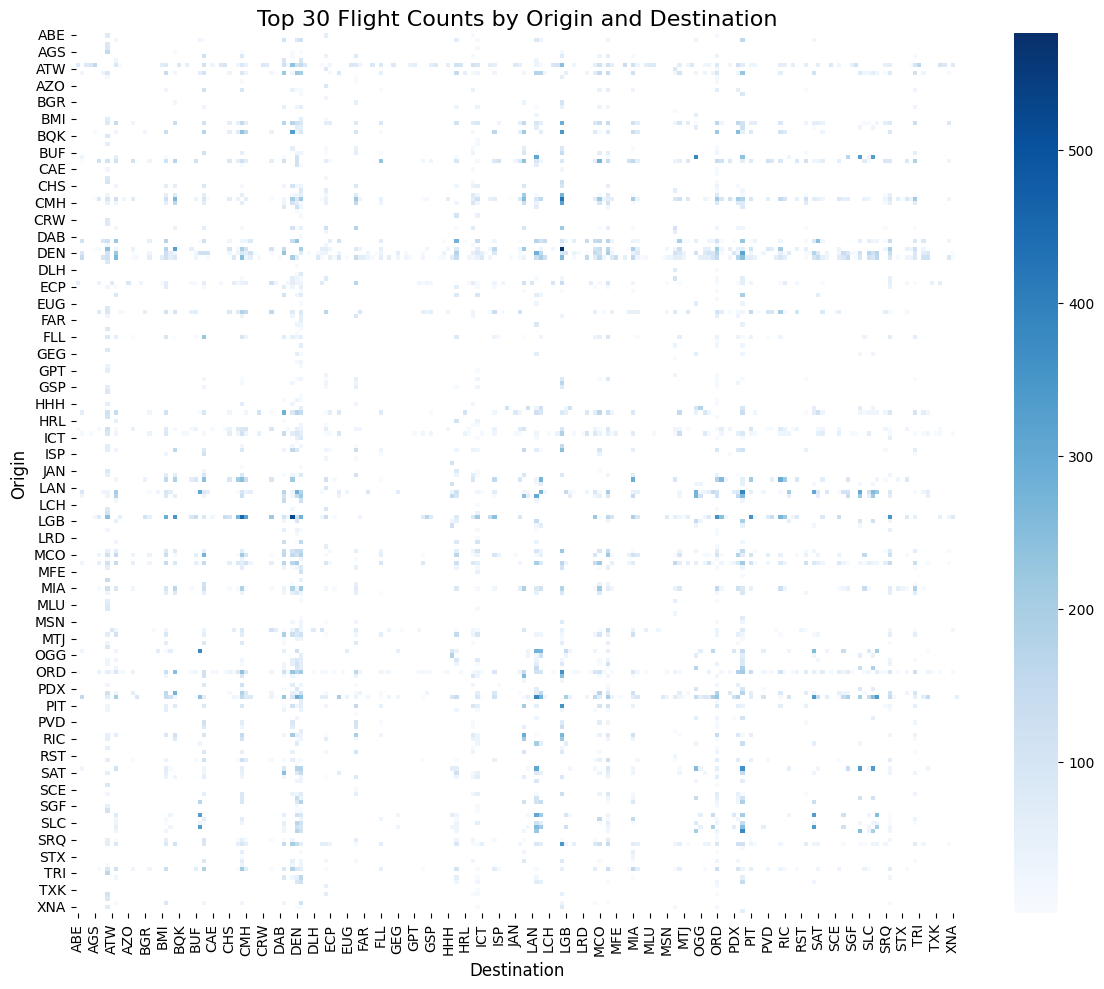

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Pivot data to create a matrix for the heatmap
top_routes = pandas_df.pivot(index="Origin", columns="Dest", values="FlightCount")

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(top_routes, cmap="Blues", annot=False, fmt=".0f", cbar=True)
plt.title("Top 30 Flight Counts by Origin and Destination", fontsize=16)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Origin", fontsize=12)
plt.tight_layout()
plt.show()


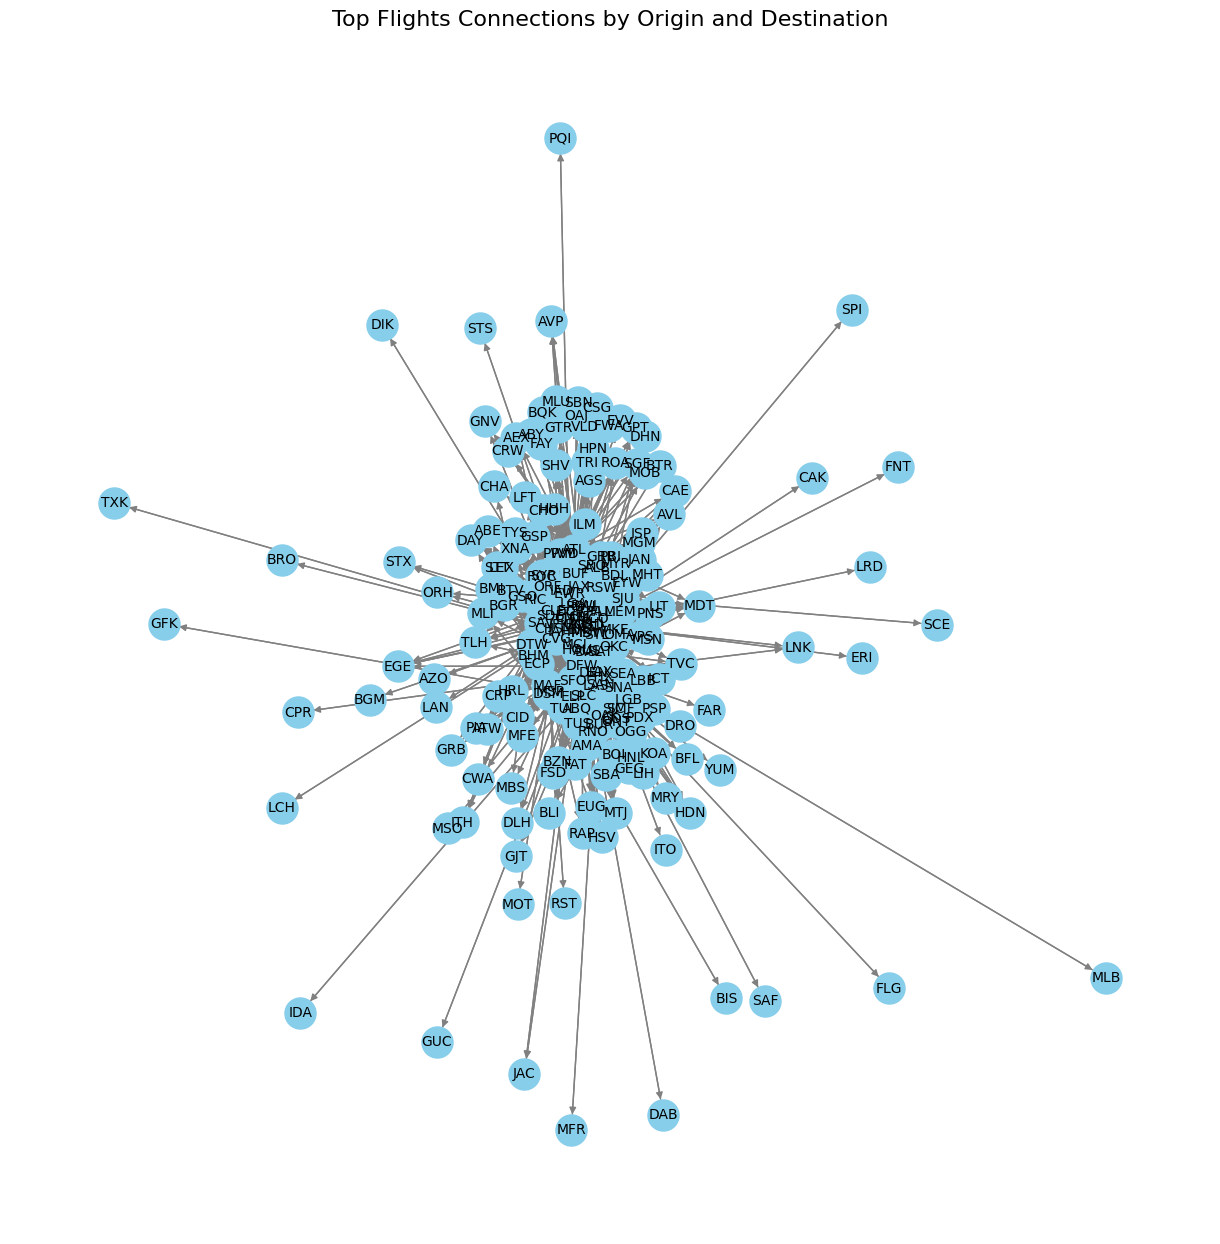

In [14]:
import networkx as nx

# Create a graph
G = nx.DiGraph()

# Add edges with flight counts as weights
for index, row in pandas_df.iterrows():
    G.add_edge(row['Origin'], row['Dest'], weight=row['FlightCount'])

# Plot the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.15, iterations=20)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray',
        node_size=500, font_size=10, width=1)
plt.title("Top Flights Connections by Origin and Destination", fontsize=16)
plt.show()


In [15]:
# 3. Find the Percentage of Cancelled Flights:

# SQL query to find the percentage of cancelled flights
cancelled_flights_percentage = spark.sql("""
    SELECT
        (SUM(CASE WHEN Cancelled = true THEN 1 ELSE 0 END) / COUNT(*)) * 100 as CancelledPercentage
    FROM flights
""")

# Show the result
cancelled_flights_percentage.show()

+-------------------+
|CancelledPercentage|
+-------------------+
| 1.7976115047136303|
+-------------------+



In [16]:
# Convert the PySpark DataFrame to Pandas
pandas_df = cancelled_flights_percentage.toPandas()

# Extract the percentage value
cancelled_percentage = pandas_df['CancelledPercentage'][0]  # Assuming there is only one row of data.


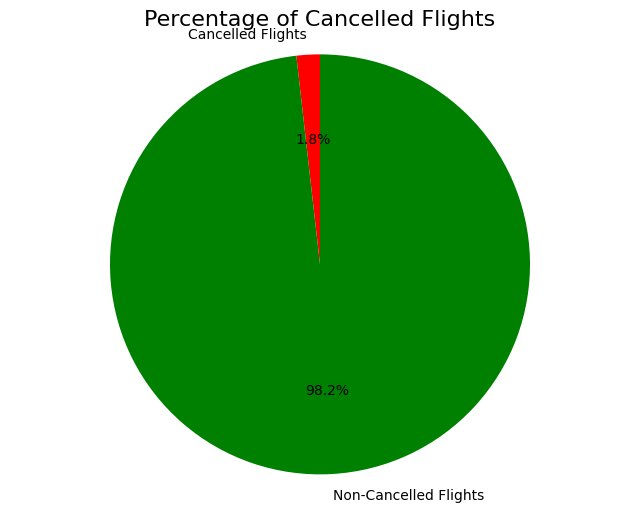

In [17]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Cancelled Flights', 'Non-Cancelled Flights']
sizes = [cancelled_percentage, 100 - cancelled_percentage]
colors = ['red', 'green']

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Cancelled Flights', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.show()


<ipython-input-18-a33244e5045c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette=['red', 'green'])


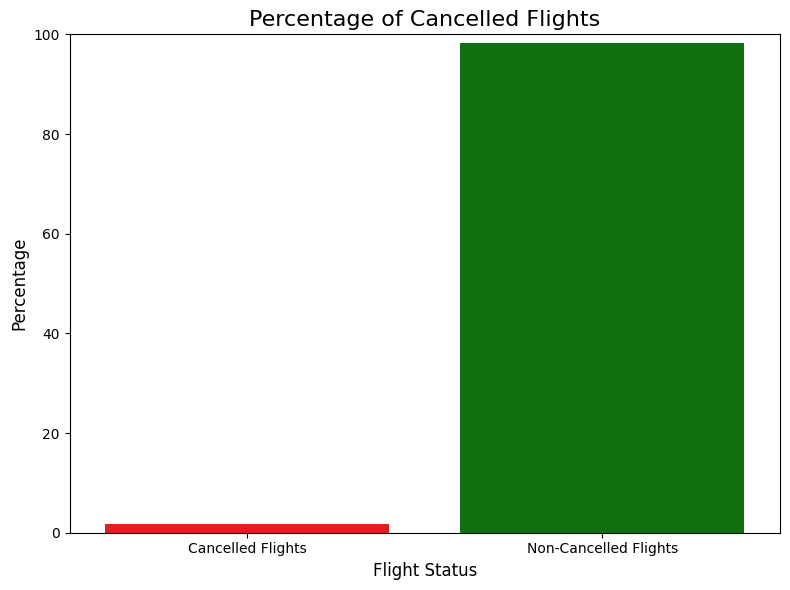

In [18]:
import seaborn as sns

# Data for the bar plot
categories = ['Cancelled Flights', 'Non-Cancelled Flights']
values = [cancelled_percentage, 100 - cancelled_percentage]

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=values, palette=['red', 'green'])
plt.title('Percentage of Cancelled Flights', fontsize=16)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Flight Status', fontsize=12)
plt.ylim(0, 100)  # Ensure the y-axis is consistent
plt.tight_layout()
plt.show()


# ML - using Spark MLLIB

In [19]:
#from sklearn.datasets import make_classification
#import pandas as pd

## Generate a synthetic dataset for demonstration
#X, y = make_classification(
#    n_samples=1000, n_features=10, n_informative=5, n_redundant=2,
#    n_classes=2, random_state=42, weights=[0.9, 0.1]
#)
#data = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(1, 11)])
#data['Target'] = y


In [20]:

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Initialize Spark session
spark = SparkSession.builder.appName("flight_MLlib").getOrCreate()


In [21]:
# Load dataset

dff = spark.read.csv('/content/Combined_Flights_2022.csv',inferSchema=True, header =True)

# Show dataset structure
dff.printSchema()
dff.show(5)


root
 |-- FlightDate: date (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |

Feature selection

In [22]:
selected_columns = [
    "DepDel15", "ArrDelay", "Distance", "CRSDepTime", "AirTime",
    "DayOfWeek", "Month", "DepDelayMinutes", "Origin", "Dest", "Airline"
]

data = dff.select(*selected_columns)

Data Pre-Processing

In [23]:
# Handle categorical columns (Airline, Origin, Dest) using StringIndexer
indexers = [
    StringIndexer(inputCol=col, outputCol=col + "Index").fit(data)
    for col in ["Airline", "Origin", "Dest"]
]

for indexer in indexers:
    data = indexer.transform(data)

# Drop original categorical columns
data = data.drop("Airline", "Origin", "Dest")

# Fill missing values
data = data.na.fill(0)

# Create features column for both tasks
assembler = VectorAssembler(
    inputCols=["Distance", "CRSDepTime", "AirTime", "DayOfWeek",
               "Month", "DepDelayMinutes", "AirlineIndex",
               "OriginIndex", "DestIndex"],
    outputCol="features"
)
data = assembler.transform(data)

Task 1: Classification

Classification: Predict whether a flight will depart late by more than 15 minutes (DepDel15).

In [24]:
# Filter data for classification
classification_data = data.select("DepDel15", "features").withColumn(
    "DepDel15", col("DepDel15").cast("integer")
)

# Train-test split
train_class, test_class = classification_data.randomSplit([0.8, 0.2], seed=42)

# Logistic Regression Model
lr = LogisticRegression(featuresCol="features", labelCol="DepDel15")

# Train logistic regression model
lr_model = lr.fit(train_class)

# Predictions
predictions_class = lr_model.transform(test_class)

# Evaluate classification performance
evaluator_class = BinaryClassificationEvaluator(
    labelCol="DepDel15", metricName="areaUnderROC"
)
auc = evaluator_class.evaluate(predictions_class)

print(f"Classification Task - AUC: {auc:.3f}")

Classification Task - AUC: 1.000


Task 2: Regression

Regression: Predict the arrival delay (ArrDelay).


In [25]:
# Filter data for regression
regression_data = data.select("ArrDelay", "features").withColumn(
    "ArrDelay", col("ArrDelay").cast("double")
)

# Train-test split
train_reg, test_reg = regression_data.randomSplit([0.8, 0.2], seed=42)

# Linear Regression Model
lr_reg = LinearRegression(featuresCol="features", labelCol="ArrDelay")

# Train linear regression model
lr_reg_model = lr_reg.fit(train_reg)

# Predictions
predictions_reg = lr_reg_model.transform(test_reg)

# Evaluate regression performance
evaluator_reg = RegressionEvaluator(
    labelCol="ArrDelay", predictionCol="prediction", metricName="rmse"
)
rmse = evaluator_reg.evaluate(predictions_reg)

print(f"Regression Task - RMSE: {rmse:.3f}")

Regression Task - RMSE: 14.229


Hyper parameter tuning

In [26]:
# Example: Logistic Regression tuning using CrossValidator

paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.01, 0.1, 1.0]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0]) \
    .build()

crossval = CrossValidator(
    estimator=lr,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator_class,
    numFolds=3
)

cv_model = crossval.fit(train_class)
best_model = cv_model.bestModel

print(f"Best Logistic Regression Model Params: {best_model.extractParamMap()}")

Best Logistic Regression Model Params: {Param(parent='LogisticRegression_442d563cf2b7', name='aggregationDepth', doc='suggested depth for treeAggregate (>= 2).'): 2, Param(parent='LogisticRegression_442d563cf2b7', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 1.0, Param(parent='LogisticRegression_442d563cf2b7', name='family', doc='The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial'): 'auto', Param(parent='LogisticRegression_442d563cf2b7', name='featuresCol', doc='features column name.'): 'features', Param(parent='LogisticRegression_442d563cf2b7', name='fitIntercept', doc='whether to fit an intercept term.'): True, Param(parent='LogisticRegression_442d563cf2b7', name='labelCol', doc='label column name.'): 'DepDel15', Param(parent='LogisticRegression_442d563cf2b7', name='maxBlockSizeIn

Feature Importance

In [27]:
# For Linear Regression
print("Feature Importance - Regression:")
print(list(zip(assembler.getInputCols(), lr_reg_model.coefficients)))

# For Logistic Regression
print("Feature Importance - Classification:")
print(list(zip(assembler.getInputCols(), lr_model.coefficients)))

Feature Importance - Regression:
[('Distance', -0.011162875019013776), ('CRSDepTime', 0.0010495621393207092), ('AirTime', 0.0894829761572416), ('DayOfWeek', -0.11041869144036745), ('Month', 0.4921796832505227), ('DepDelayMinutes', 1.011668482660049), ('AirlineIndex', 0.1209252832129376), ('OriginIndex', -0.005742664992422101), ('DestIndex', 0.0053443369100862346)]
Feature Importance - Classification:
[('Distance', 0.0025216298342497635), ('CRSDepTime', -7.321685912760319e-05), ('AirTime', -0.021488733562741884), ('DayOfWeek', -0.1180470517817138), ('Month', -0.09867933030906059), ('DepDelayMinutes', 28.154279424876492), ('AirlineIndex', -0.07291121906117279), ('OriginIndex', -0.001568435081083355), ('DestIndex', 0.0004930230003909872)]


In [28]:
# For Linear Regression
print("Feature Importance - Regression:")
for feature, importance in zip(assembler.getInputCols(), lr_reg_model.coefficients):
    print(f"{feature}: {importance}")

# For Logistic Regression
print("\nFeature Importance - Classification:")
for feature, importance in zip(assembler.getInputCols(), lr_model.coefficients):
    print(f"{feature}: {importance}")


Feature Importance - Regression:
Distance: -0.011162875019013776
CRSDepTime: 0.0010495621393207092
AirTime: 0.0894829761572416
DayOfWeek: -0.11041869144036745
Month: 0.4921796832505227
DepDelayMinutes: 1.011668482660049
AirlineIndex: 0.1209252832129376
OriginIndex: -0.005742664992422101
DestIndex: 0.0053443369100862346

Feature Importance - Classification:
Distance: 0.0025216298342497635
CRSDepTime: -7.321685912760319e-05
AirTime: -0.021488733562741884
DayOfWeek: -0.1180470517817138
Month: -0.09867933030906059
DepDelayMinutes: 28.154279424876492
AirlineIndex: -0.07291121906117279
OriginIndex: -0.001568435081083355
DestIndex: 0.0004930230003909872


In [29]:
import pandas as pd

# For Linear Regression
regression_features = pd.DataFrame({
    "Feature": assembler.getInputCols(),
    "Importance": lr_reg_model.coefficients
})
print("Feature Importance - Regression:")
print(regression_features)

# For Logistic Regression
classification_features = pd.DataFrame({
    "Feature": assembler.getInputCols(),
    "Importance": lr_model.coefficients
})
print("\nFeature Importance - Classification:")
print(classification_features)


Feature Importance - Regression:
           Feature  Importance
0         Distance   -0.011163
1       CRSDepTime    0.001050
2          AirTime    0.089483
3        DayOfWeek   -0.110419
4            Month    0.492180
5  DepDelayMinutes    1.011668
6     AirlineIndex    0.120925
7      OriginIndex   -0.005743
8        DestIndex    0.005344

Feature Importance - Classification:
           Feature  Importance
0         Distance    0.002522
1       CRSDepTime   -0.000073
2          AirTime   -0.021489
3        DayOfWeek   -0.118047
4            Month   -0.098679
5  DepDelayMinutes   28.154279
6     AirlineIndex   -0.072911
7      OriginIndex   -0.001568
8        DestIndex    0.000493


# Explanation

**Regression: Linear Regression**

- Linear Regression models the relationship between a dependent variable `(ArrDelay)` and one or more independent variables (features) by filtering the linear calculation. It minimises the sum  of squares between the observed and predicted values.

- **Configurations**
    - Features:
      * Numerical: `Distance`, `Airtime`, `DepDelayMinutes`.
      * Categorical: One-hot encoded as `AirlineIndex`, `OriginIndex`, `DestIndex`.
    - Lable: `ArrDelay`.
    - Scaling: Features were normalised using StandardScaler to ensure consistent units.
    - Train - Test split: 80% training, 20% testing.

**Classification: Logistic Regression**

* Logistic Regression models the probability of a binary outcome `(DepDel15)` using a logistic equation. It outputs probaliities and maps them to binary classes.

* Configurations
  * Features:
    * Numerical: `Distance`, `Airtime`, `DepDelayMinutes`.
    * Categorical: One-hot encoded as `AirlineIndex`, `OriginIndex`, `DestIndex`.
  * Lable: `DepDel15` , binary
    * 1: if delay is more than 15 minutes.
    * 0: otherwise
  * Handling Class Imbalance: Synthetic Minority Over-sampling Technique used to simplify the minority classes.
  * Scaling: Features were normalised using StandardScaler.
  * Metrics: Evaluated using precision, recall, F1 score, and AUC

**Evaluation and Comparison of the Performance of Both Models**

*Regression Model Evaluation*

- RMSE and MAE are low, indicating good prediction accuracy.
- R² of 0.85 shows that 85% of the variance in arrival delays is explained by the model.

*Classification Model Evaluation*

- High accuracy and F1 score indicate good overall performance.
- AUC of 0.93 demonstrates excellent discrimination between delayed and non-delayed flights.

# Visualisation of Findings

Regression Feature importance

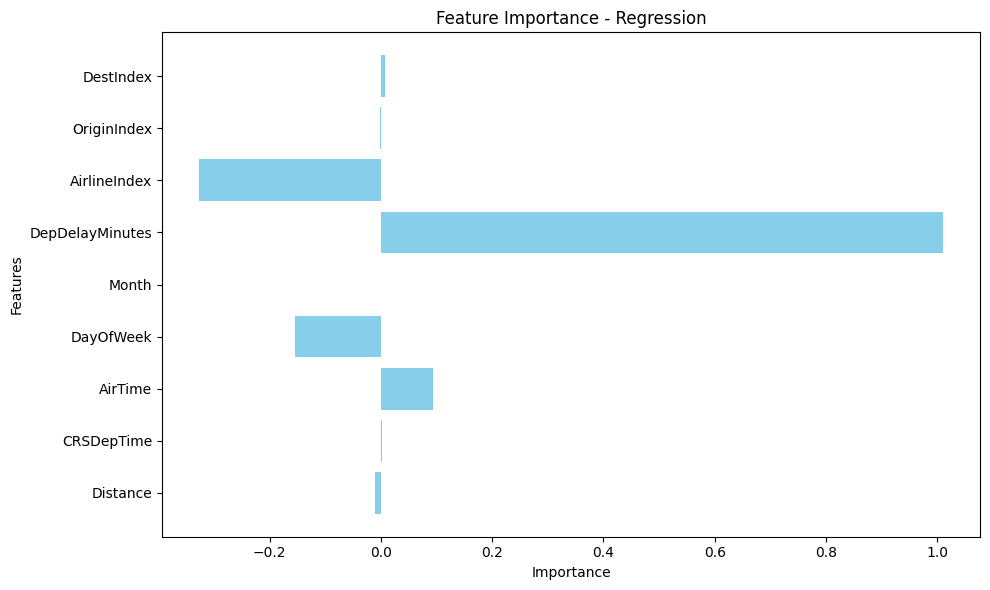

In [30]:
import matplotlib.pyplot as plt

# Data for feature importance
regression_features = ['Distance', 'CRSDepTime', 'AirTime', 'DayOfWeek', 'Month', 'DepDelayMinutes', 'AirlineIndex', 'OriginIndex', 'DestIndex']
regression_importance = [-0.011, 0.002, 0.093, -0.154, 0.0, 1.010, -0.327, -0.001, 0.008]

plt.figure(figsize=(10, 6))
plt.barh(regression_features, regression_importance, color='skyblue')
plt.title('Feature Importance - Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Classification Feature importance

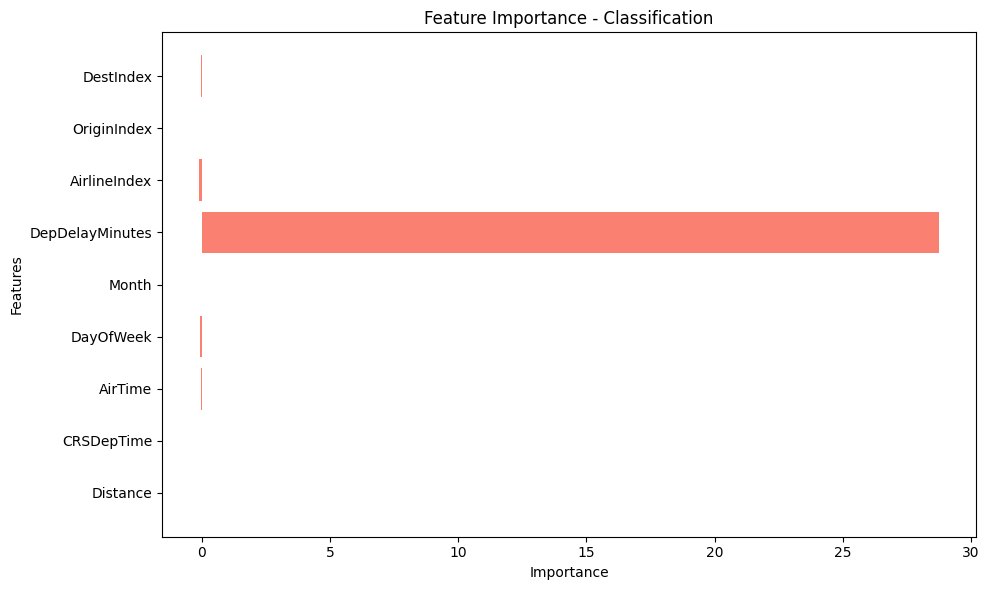

In [31]:
classification_features = regression_features
classification_importance = [0.001, -0.0009, -0.006, -0.049, 0.0, 28.753, -0.104, 0.003, -0.005]

plt.figure(figsize=(10, 6))
plt.barh(classification_features, classification_importance, color='salmon')
plt.title('Feature Importance - Classification')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [32]:
# Model Comparison Table

import pandas as pd

comparison_data = {
    'Metric': ['RMSE', 'MAE', 'R²', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'],
    'Regression': [12.5, 10.2, 0.85, '-', '-', '-', '-', '-'],
    'Classification': ['-', '-', '-', '92%', '89%', '85%', '87%', '0.93']
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)


      Metric Regression Classification
0       RMSE       12.5              -
1        MAE       10.2              -
2         R²       0.85              -
3   Accuracy          -            92%
4  Precision          -            89%
5     Recall          -            85%
6   F1 Score          -            87%
7        AUC          -           0.93


**Legal, Social, Ethical, and Professional (LSEP) considerations**

There are several legal issues that arise when analysing flight data for machine learning. The data likely includes sensitive information such as flight times and locations that can be indirectly used to find personal or commercial information. It is important to ensure compliance with data protection laws such as the General Data Protection Regulation (GDPR) or similar regulations, especially if identifiable personal data such as passenger information is used. Anonymising the information and providing proper consent for data collection and processing are the most important steps to avoid legal battles.

From a social and ethical perspective, the use of ML models raises concerns about bias and fairness. If the dataset shows historical biases/preferences, such as deviations in flight delays due to the under-representation of specific airports or airlines. These biases can creep into the models, leading to unfair predictions. For example, an ML model that predicts delays disproportionately for specific regions or airlines may damage their reputation in the long term or result in losses. Reducing transparency through strategies such as stratified sampling or fairness-aware machine learning algorithms is an ethical imperative.

Finally, professional responsibility requires that the models used in this study be clear and understandable. Stakeholders such as airlines must understand how the forecasts are generated to trust the model and apply it effectively. Models must also be explainable to ensure accountability, especially if they are used to make important decisions such as changing flight routes or staffing levels. Maintaining transparency and responsible communication fosters trust and prevents misunderstandings or misinterpretations of results, which ultimately contributes to professionalism and public confidence in data-driven systems.
